# Custom preprocessing

In [385]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

def get_mean(data):
    return sum(data)/len(data)

def get_variance(data):
    mean = get_mean(data)
    n = len(data)
    variance = 0
    for i in data:
        variance += (i - mean)**2
    variance = variance/(n-1)
    return variance

def get_std(data):
    return math.sqrt(get_variance(data))

def get_quantile(data, probability):
    k = int(probability * (len(data) - 1))
    alpha = probability * len(data)
    sorted_data = sorted(data)
    sorted_data.append(sorted_data[len(data) - 1])
    if k + 1 < alpha:
        return sorted_data[k + 1]
    elif k + 1 == alpha:
        return (sorted_data[k] + sorted_data[k + 1]) / 2
    else:
        return sorted_data[k]

def get_description(data, rows):
    info = {}

    for row in rows:
        info[row] = []
        q25 = get_quantile(data[row], 0.25)
        q75 = get_quantile(data[row], 0.75)
        info[row].append(q25)
        info[row].append(get_quantile(data[row], 0.5))
        info[row].append(q75)
        info[row].append(q75-q25)
        info[row].append(get_variance(data[row]))
        info[row].append(get_mean(data[row]))
    return pd.DataFrame(info, index=['0.25',
                                   '0.5',
                                   '0.75', 'interquartile range', 'variance', 'mean'])

def get_correlation(df, fields, targets):
    info = {}

    for i in fields:
        info[i] = []
        mean_i = get_mean(df[i])
        for j in targets:
            mean_j = get_mean(df[j])
            a1 = 0
            for k in range(len(df[i])):
                a1 += (df[i][k] - mean_i) * (df[j][k] - mean_j)
            b1 = 0
            for k in df[i]:
                b1 += (k - mean_i)**2
            b2 = 0
            for k in df[j]:
                b2 += (k - mean_j)**2
            info[i].append(a1/math.sqrt(b1*b2))

    return pd.DataFrame(info, index=targets)




def plot_field(df, field):
    mean_value = get_mean(df[field])
    std = get_std(df[field])
    df.hist(column=field, bins=39)
    plt.axvline(mean_value, color='g', linestyle='dashed', linewidth=2)
    plt.axvline(mean_value - 2.5 * std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(mean_value + 2.5 * std, color='r', linestyle='dashed', linewidth=2)
    plt.show()

def plot_correlation(df, field1, field2):
    plt.xlabel(field1)
    plt.ylabel(field2)
    plt.scatter(df[field1], df[field2])
    plt.show()

## Region 1

In [386]:
df = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_train.csv", index_col=0)
df.drop_duplicates()
df.head(5)

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


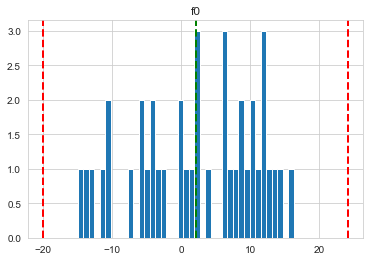

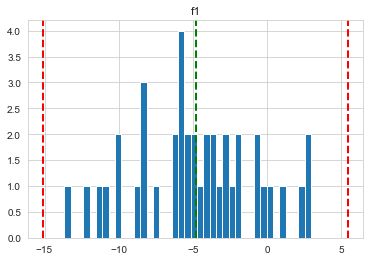

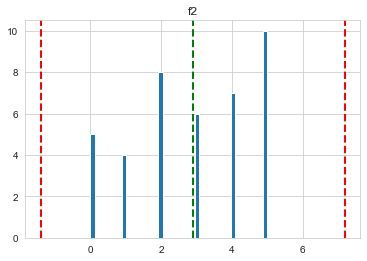

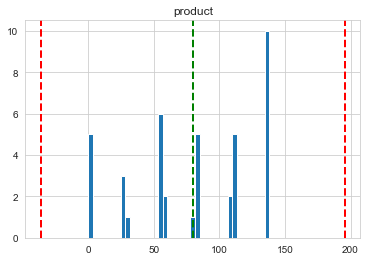

In [387]:
plot_field(df, 'f0')
plot_field(df, 'f1')
plot_field(df, 'f2')
plot_field(df, 'product')

In [388]:
get_description(df, ['f0', 'f1', 'f2', 'product'])

,f0,f1,f2,product
0.25,-4.583259,-7.858557,2.002290,53.906522
0.5,2.460140,-4.793330,2.995529,84.038886
0.75,9.800763,-2.033323,4.498138,122.879226
interquartile range,14.384022,5.825234,2.495848,68.972704
variance,77.857876,16.820996,2.961965,2155.426415
mean,2.077724,-4.821013,2.899393,79.675956


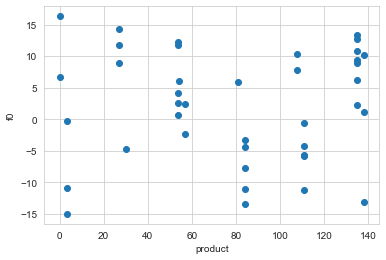

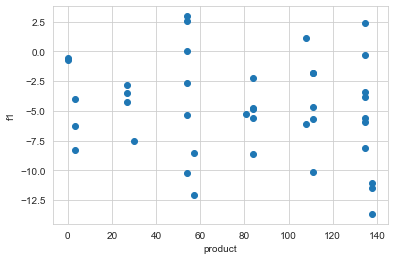

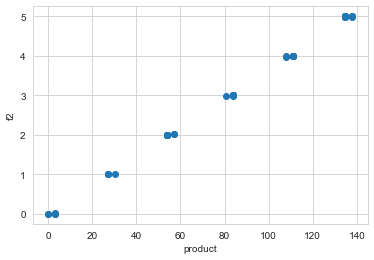

In [389]:
plot_correlation(df, 'product', 'f0')
plot_correlation(df, 'product', 'f1')
plot_correlation(df, 'product', 'f2')


In [390]:
get_correlation(df, ['f0', 'f1', 'f2'], ['product'])


,f0,f1,f2
product,0.030459,-0.167566,0.999405


## Region 2

In [391]:
df = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place2_train.csv", index_col=0)
df.drop_duplicates()


,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746
LzZXx,-0.758092,0.710691,2.585887,90.222465
WBHRv,-0.574891,0.317727,1.773745,45.641478
XO8fn,-1.906649,-2.458350,-0.177097,72.480640
ybmQ5,1.776292,-0.279356,3.004156,106.616832


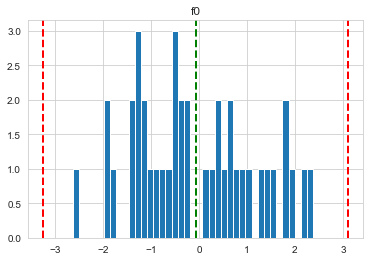

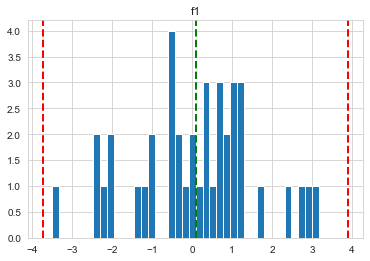

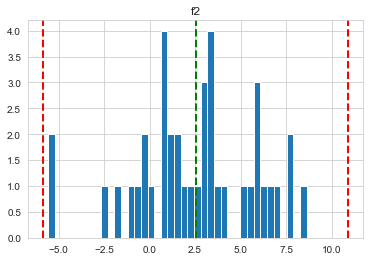

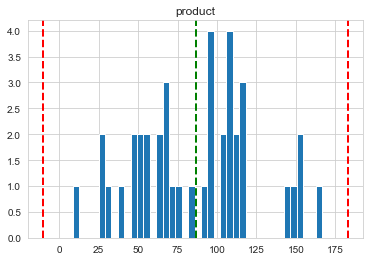

In [392]:
plot_field(df, 'f0')
plot_field(df, 'f1')
plot_field(df, 'f2')
plot_field(df, 'product')

In [393]:
get_description(df, ['f0', 'f1', 'f2', 'product'])

,f0,f1,f2,product
0.25,-1.180719,-0.756717,0.832177,56.273969
0.5,-0.347388,0.215317,2.742131,92.237154
0.75,0.831409,1.020535,5.280436,111.079863
interquartile range,2.012129,1.777253,4.448259,54.805894
variance,1.613436,2.322053,11.198723,1489.960636
mean,-0.074466,0.085683,2.523979,86.420739


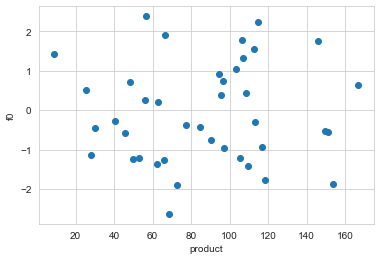

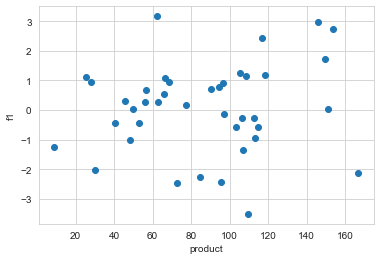

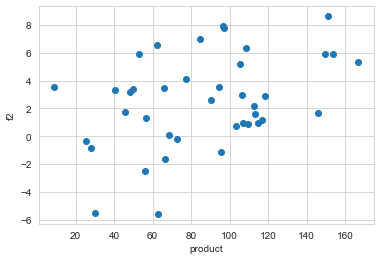

In [394]:
plot_correlation(df, 'product', 'f0')
plot_correlation(df, 'product', 'f1')
plot_correlation(df, 'product', 'f2')


In [395]:
get_correlation(df, ['f0', 'f1', 'f2'], ['product'])


,f0,f1,f2
product,0.036499,0.133977,0.397795


## Region 3

In [396]:
df = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place3_train.csv", index_col=0)
df.drop_duplicates()


,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647
wX4Hy,0.969570,0.489775,-0.735383,64.741541
tL6pL,0.645075,0.530656,1.780266,49.055285
BYPU6,-0.400648,0.808337,-5.624670,72.943292
j9Oui,0.643105,-0.551583,2.372141,113.356160


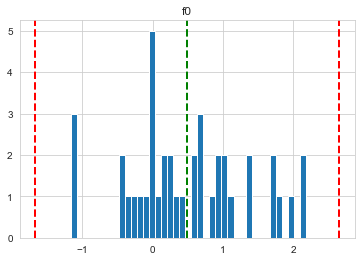

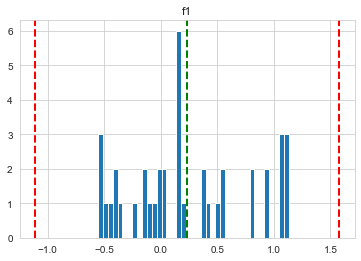

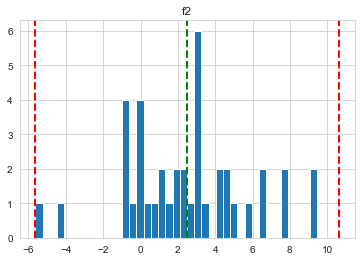

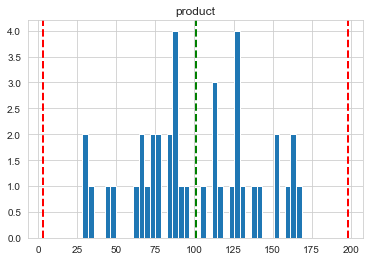

In [397]:
plot_field(df, 'f0')
plot_field(df, 'f1')
plot_field(df, 'f2')
plot_field(df, 'product')

In [398]:
get_description(df, ['f0', 'f1', 'f2', 'product'])

,f0,f1,f2,product
0.25,-0.025375,-0.146238,0.052396,72.990521
0.5,0.375989,0.152643,2.580888,92.721689
0.75,1.009346,0.675925,4.444135,127.702497
interquartile range,1.034721,0.822163,4.391739,54.711976
variance,0.749148,0.289600,10.628555,1517.399127
mean,0.490485,0.233529,2.501777,100.709822


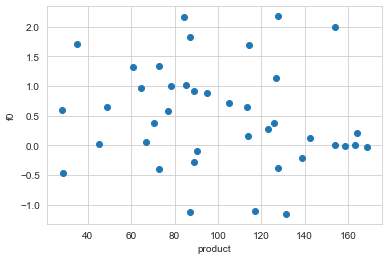

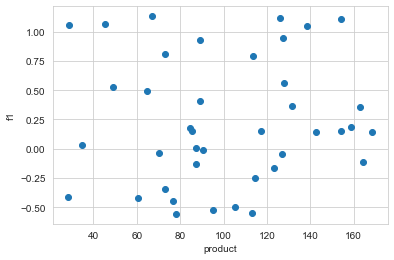

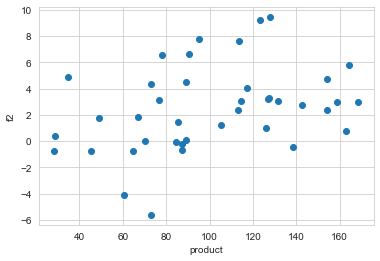

In [399]:
plot_correlation(df, 'product', 'f0')
plot_correlation(df, 'product', 'f1')
plot_correlation(df, 'product', 'f2')


In [400]:
get_correlation(df, ['f0', 'f1', 'f2'], ['product'])


,f0,f1,f2
product,-0.151643,0.055711,0.341304


# Preprocessing with Pandas

In [401]:
df.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, txEyH to Fo4B8
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       40 non-null     float64
 1   f1       40 non-null     float64
 2   f2       40 non-null     float64
 3   product  40 non-null     float64
dtypes: float64(4)
memory usage: 2.6+ KB


In [403]:
df.describe()

,f0,f1,f2,product
count,40.000000,40.000000,40.000000,40.000000
mean,0.490485,0.233529,2.501777,100.709822
std,0.865533,0.538145,3.260147,38.953808
min,-1.157504,-0.555728,-5.624670,28.207978
25%,-0.021976,-0.138638,0.073990,73.014136
50%,0.375989,0.152643,2.580888,92.721689
75%,1.002653,0.619811,4.404607,127.598274
max,2.173381,1.130622,9.441852,168.620776


In [404]:
df.corr()

,f0,f1,f2,product
f0,1.000000,-0.379250,0.177800,-0.151643
f1,-0.379250,1.000000,-0.220982,0.055711
f2,0.177800,-0.220982,1.000000,0.341304
product,-0.151643,0.055711,0.341304,1.000000


In [405]:
df.isnull().count()

f0         40
f1         40
f2         40
product    40
dtype: int64

In [406]:
def clear_data(df):
    df.drop_duplicates()
    df = df[df['f0'] > (df['f0'].mean() - 2.5 * df['f0'].std())]
    df = df[df['f1'] > (df['f1'].mean() - 2.5 * df['f1'].std())]
    df = df[df['f2'] > (df['f2'].mean() - 2.5 * df['f2'].std())]
    df = df[df['f0'] < (df['f0'].mean() + 2.5 * df['f0'].std())]
    df = df[df['f1'] < (df['f1'].mean() + 2.5 * df['f1'].std())]
    df = df[df['f2'] < (df['f2'].mean() + 2.5 * df['f2'].std())]
    return df


# Creating model

In [407]:
region1_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_train.csv")
region2_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place2_train.csv")
region3_train = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place3_train.csv")

region1_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place1_test.csv")
region2_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place2_test.csv")
region3_test = pd.read_csv("C:\\Users\\milan\\Documents\\BMSTU\\Modeling\\lab_4_place3_test.csv")

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


RANDOM_STATE = np.random.RandomState(1000)

CONCEIVED_SIZE = 500
REGION_BUDGET = lambda ds_size: math.floor(10_000_000_000 / CONCEIVED_SIZE * ds_size)
DROPOUT_LIMIT = lambda ds_size: math.floor(200 / CONCEIVED_SIZE * ds_size)
PROFIT_PER_T_BARREL = 450000
ACCEPTABLE_RISK = 0.025
TARGET = 'product'


SUFFICIENT_VOLUME = lambda ds_size: REGION_BUDGET(ds_size) / DROPOUT_LIMIT(ds_size) / PROFIT_PER_T_BARREL

def get_features(data, scaler = None):
    result = data[['f0', 'f1', 'f2']]
    if scaler is not None:
        result = scaler.transform(result)
    return result

def get_model_and_scaler_with_RMSE(data):
    target = data[TARGET]
    features = get_features(data)
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    linear_regression = LinearRegression()
    linear_regression.fit(features_train, target_train)

    predictions_valid = linear_regression.predict(features_valid)
    err = mean_squared_error(target_valid, predictions_valid, squared=False)
    print(f"RMSE модели: {err:.2f}")
    return linear_regression, scaler

def get_model_and_scaler(data):
    target = data[TARGET]
    features = get_features(data)
    scaler = StandardScaler()
    scaler.fit(features)
    features_train = scaler.transform(features)
    linear_regression = LinearRegression()
    linear_regression.fit(features_train, target)

    return linear_regression, scaler


def get_region_info(train_data, test_data):
    model, scaler = get_model_and_scaler(train_data)
    test_data['predictions'] = model.predict(get_features(test_data, scaler))
    best_well = test_data.sort_values(by='predictions',
                                      ascending=False)[:DROPOUT_LIMIT(len(test_data))]
    # print("Выбранные скважины: ", best_well['id'].values)
    print(f"Средний объем добычи с одной скважины: {best_well[TARGET].mean():_}")
    profit = PROFIT_PER_T_BARREL * best_well[TARGET].sum() - \
             REGION_BUDGET(len(test_data))
    print(f"Прибыль региона: {profit:_}")
    bootstrap_results = []
    for i in range(100):
        sample = test_data.sample(frac=0.9, random_state=RANDOM_STATE, replace=False)
        best_of_sample = sample.sort_values(by='predictions',
                                            ascending=False)[:DROPOUT_LIMIT(len(test_data))]
        sample_profit = PROFIT_PER_T_BARREL * best_of_sample[TARGET].sum() - \
                        REGION_BUDGET(len(test_data))
        bootstrap_results.append(sample_profit)
    bootstrap_results = pd.Series(bootstrap_results)
    # print(bootstrap_results)
    mean = bootstrap_results.mean() #расчет средней прибыли
    print(f"Средняя прибыль, руб.: {mean:_.2f}")
    lower = bootstrap_results.quantile(.025) #строим доверительный интервал
    upper = bootstrap_results.quantile(.975)
    print(f"95% доверительный интервал: {lower:_.2f} : {upper:_.2f}")
    risk = bootstrap_results[bootstrap_results < 0].size / bootstrap_results.size * 100
    print(f"Риск убытков в данном регионе: {risk:.2f}%")
    err = mean_squared_error(test_data[TARGET], test_data['predictions'], squared=False)
    print(f"Итоговое RMSE модели: {err:.2f}")
    return test_data
print(f"Минимальная средняя продуктивность скважины для достижения порога окупаемости: {SUFFICIENT_VOLUME((len(region1_train)+len(region1_test))*0.25)}")
print("\nПервый регион:")
train_r1, test_r1 = train_test_split(pd.concat([region1_train, region1_test]),
                                     test_size=0.25, random_state=RANDOM_STATE)
a = get_region_info(train_r1.copy(), test_r1.copy())
print("\nВторой регион:")
train_r2, test_r2 = train_test_split(pd.concat([region2_train, region2_test]),
                                     test_size=0.25, random_state=RANDOM_STATE)
b = get_region_info(train_r2.copy(), test_r2.copy())
print("\nТретий регион:")
train_r3, test_r3 = train_test_split(pd.concat([region3_train, region3_test]),
                                     test_size=0.25, random_state=RANDOM_STATE)
c = get_region_info(train_r3.copy(), test_r3.copy())

Минимальная средняя продуктивность скважины для достижения порога окупаемости: 111.11111111111111

Первый регион:
Средний объем добычи с одной скважины: 118.835882
Прибыль региона: 27_809_175.199999988
Средняя прибыль, руб.: 32_486_266.29
95% доверительный интервал: 12_530_314.85 : 77_767_841.75
Риск убытков в данном регионе: 0.00%
Итоговое RMSE модели: 45.13

Второй регион:
Средний объем добычи с одной скважины: 90.99645675
Прибыль региона: -72_412_755.70000005
Средняя прибыль, руб.: -66_492_708.88
95% доверительный интервал: -90_951_331.87 : -39_181_230.15
Риск убытков в данном регионе: 100.00%
Итоговое RMSE модели: 40.13

Третий регион:
Средний объем добычи с одной скважины: 115.75847225
Прибыль региона: 16_730_500.099999964
Средняя прибыль, руб.: -13_325_768.48
95% доверительный интервал: -82_530_229.84 : 16_730_500.10
Риск убытков в данном регионе: 65.00%
Итоговое RMSE модели: 42.64


In [409]:
a #перемешать обучающую и тестирующие выборки

,id,f0,f1,f2,product,predictions
13,k52cq,1.025913,-0.502227,1.029092,157.684787,63.368982
26,t02tS,0.206934,0.837325,6.343240,130.458019,145.637210
7,ewfDM,0.735073,-0.392385,-1.443289,31.610146,26.625058
3,ET3QY,-0.551515,0.770938,9.833564,160.476426,197.919435
34,5O3Zt,-4.792992,-7.569682,1.004281,30.132364,50.777366
27,vTass,1.004799,0.539763,6.592556,147.716278,148.639666
4,K0xka,2.095151,0.348512,6.898868,26.926149,152.636864
19,dkcEb,-4.373526,-8.590017,2.995379,84.038886,78.560557
32,vgK5D,0.637601,0.751503,2.918322,95.180855,94.112778
33,sOhIk,-0.176367,0.912145,5.241132,89.619662,129.359446


In [410]:
print("\n Две части данных смешаны: ")
train_r1, test_r1 = train_test_split(pd.concat([region1_train, region1_test]), test_size=0.25, random_state=RANDOM_STATE)
get_region_info(train_r1.copy(), test_r1.copy())
print("\n Первая используется для обучения, вторая для тестирования")
get_region_info(region1_train.copy(), region1_test.copy())
print("\n Первая часть данных разбита для обучения и тестирования")
train_r1, test_r1 = train_test_split(region1_train, test_size=0.25, random_state=RANDOM_STATE)
get_region_info(train_r1.copy(), test_r1.copy())
print("\n Вторая часть данных разбита для обучения и тестирования")
train_r1, test_r1 = train_test_split(region1_test, test_size=0.25, random_state=RANDOM_STATE)
_ = get_region_info(train_r1.copy(), test_r1.copy())


 Две части данных смешаны: 
Средний объем добычи с одной скважины: 125.093927875
Прибыль региона: 50_338_140.350000024
Средняя прибыль, руб.: 43_517_953.95
95% доверительный интервал: 15_333_122.30 : 82_275_595.06
Риск убытков в данном регионе: 0.00%
Итоговое RMSE модели: 44.96

 Первая используется для обучения, вторая для тестирования
Средний объем добычи с одной скважины: 117.6259535625
Прибыль региона: 46_906_865.649999976
Средняя прибыль, руб.: 62_637_409.32
95% доверительный интервал: 19_950_845.76 : 107_612_615.35
Риск убытков в данном регионе: 0.00%
Итоговое RMSE модели: 67.84

 Первая часть данных разбита для обучения и тестирования
Средний объем добычи с одной скважины: 116.14091074999999
Прибыль региона: 9_053_639.349999994
Средняя прибыль, руб.: 3_760_433.59
95% доверительный интервал: -15_204_295.55 : 9_053_639.35
Риск убытков в данном регионе: 28.00%
Итоговое RMSE модели: 1.20

 Вторая часть данных разбита для обучения и тестирования
Средний объем добычи с одной скважины

# Черновики

In [411]:
'''Подготовьтесь к расчёту прибыли:
1. Все ключевые значения для расчётов сохраните в отдельных переменных.
2. Рассчитайте достаточный объём сырья для безубыточной разработки новой
скважины. Сравните полученный объём сырья со средним запасом в каждом
регионе.
3. Сделайте выводы по этапу подготовки расчёта прибыли.'''
#Определим ряд констант, необходимых для исследования
COSTS = 10**7 #бюджет на разработку
INCOME = 450 #доход с одного бареля нефти
COUNT_REGION = 10 #количество исследуемых точек в одном регионе
BOREHOLES = 200 #количество выбранных скважин для разработки месторождения
loss_threshold = COSTS/(BOREHOLES*INCOME) #Минимальная средняя продуктивность скважины для достижения порога окупаемости
region_threshold = round(BOREHOLES*loss_threshold,1) #Минимальная продуктивность 200 скважин региона для достижения порога окупаемости
print('Минимальная средняя продуктивность скважины для достижения порога окупаемости:', round(loss_threshold,1), '(тыс. баррелей)')

'''
Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям
модели:
1. Выберите скважины с максимальными значениями предсказаний.
2. Просуммируйте целевое значение объёма сырья, соответствующее этим
предсказаниям.
3. Рассчитайте прибыль для полученного объёма сырья.
'''
#Рассчитать прибыль для полученного объёма сырья
#функция для расчета прибыли
def profit(target, predictions, count):
    #выбираем скважины с максимальными значениями предсказаний, число скажин в переменной count
    best_pred = pd.Series(predictions).sort_values(ascending=False)[:count]
    best_target = target.reset_index(drop = True)[best_pred.index]
    profit = INCOME * best_target.sum() - COSTS
    return profit # прибыль для полученного объёма сырья.

# print("Прибыль в первой локации:", profit(target_valid_1, predictions_valid_1, BOREHOLES).round(),'рублей')
# print("Прибыль во второй локации:", profit(target_valid_2, predictions_valid_2, BOREHOLES).round(),'рублей')
# print("Прибыль в третьей локации:", profit(target_valid_3, predictions_valid_3, BOREHOLES).round(),'рублей')

'''
Посчитайте риски и прибыль для каждого региона:
1. Найти распределение прибыли. Выборки небольшие, поэтому есть смысл
использовать технологию bootstrap
2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков.
Убыток — это отрицат ельная прибыль.
3. Напишите выводы: предложите регион для разработки скважин и обоснуйте
выбор.
'''

state = np.random.RandomState(12345) #обеспечим случайность формируемых выборок

def region_profit(target, predictions, count = 4):
    values = []
    for i in range(1000):
        target_sample = target.reset_index(drop=True).sample(COUNT_REGION, replace=False,
                                         random_state=state) #
        probs_sample = predictions[target_sample.index]
        best_pred = pd.Series(probs_sample).sort_values(ascending=False)[:count] #выбираем месторождения с лучшими показателями
        best_target = target_sample.reset_index(drop=True)[best_pred.index]

        profit = INCOME * best_target.sum() - COSTS #расчет прибыли
        values.append(profit)

    values = pd.Series(values)
    mean = values.mean() #расчет средней прибыли
    print('Средняя прибыль, руб.: {:,.2f}'.format(mean))

    lower = values.quantile(.025) #строим доверительный интервал
    upper = values.quantile(.975)

    print('95% доверительный интервал:', '{:,.2f}'.format(lower), ':',
          '{:,.2f}'.format(upper))



Минимальная средняя продуктивность скважины для достижения порога окупаемости: 111.1 (тыс. баррелей)
